## A 1DCNN network for MNIST image classification

In [14]:
# Import the required packages
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, Conv1D, MaxPooling1D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

from keras.utils import to_categorical

# Get the training data

In [5]:
# Get the training data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [6]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


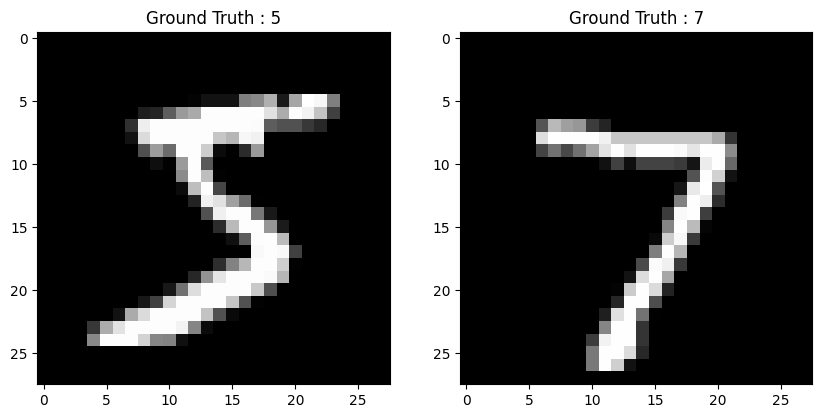

In [7]:
# let's see some sample images in the dataset

# Define the plot size
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
plt.show()

### Alternative: Use seaborn or OpenCV for visualization

In [8]:
# Change the image format from 2D array of size 28x28 to 1D arrya of size 784
print(train_images.shape)

(60000, 28, 28)


In [9]:
# Get the size of required 1D array

dim_data = np.prod(train_images.shape[1:])
print(dim_data)

784


In [10]:
# Now reshape the 2D array to 1D array

train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [19]:
train_data.shape

(60000, 784)

In [20]:
# Change to float datatype and reshape to make it compatible for 1DCNN

train_data = train_data.astype('float32').reshape(train_data.shape[0], train_data.shape[1], 1)
test_data = test_data.astype('float32').reshape(test_data.shape[0], test_data.shape[1], 1)

In [22]:
train_data.shape

(60000, 784, 1)

In [12]:
# Change the labels from integer to categorical data

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Check how the one hot encoded labels look like
print(test_labels_one_hot[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [30]:
model = Sequential([
    Conv1D(filters=2, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=(dim_data,1)),
    Conv1D(filters=2, kernel_size=5, strides=1, padding="causal", activation="relu"),
    MaxPooling1D(pool_size=2),

    Dropout(rate=0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(classes_num, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_48 (Conv1D)              │ (None, 784, 2)         │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_49 (Conv1D)              │ (None, 784, 2)         │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 392, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 392, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,180 (434.30 KB)

 Trainable params: 111,180 (434.30 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [31]:
# Now we can start the training

history = model.fit(train_data, train_labels_one_hot, batch_size=32, epochs=10, verbose =1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 16ms/step - accuracy: 0.7410 - loss: 0.9963 - val_accuracy: 0.9492 - val_loss: 0.1645
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9411 - loss: 0.1904 - val_accuracy: 0.9661 - val_loss: 0.1116
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9590 - loss: 0.1302 - val_accuracy: 0.9690 - val_loss: 0.1001
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9667 - loss: 0.1057 - val_accuracy: 0.9743 - val_loss: 0.0804
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9735 - loss: 0.0873 - val_accuracy: 0.9739 - val_loss: 0.0790
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9743 - loss: 0.0811 - val_accuracy: 0.9767 - val_loss: 0.0780
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9783 - loss: 0.0676 - val_accuracy: 0.9726 - val_loss: 0.0850
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9797 -

## Evaluate the model

In [32]:
# let's run the trained model on test data and see how it performs

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9746 - loss: 0.0828
Evaluation result on Test Data : Loss = 0.06987408548593521, accuracy = 0.9793000221252441


## Run the sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Probability of all the classes: [[8.4411693e-07 5.5544824e-06 9.9968827e-01 2.4887564e-04 2.2479878e-10
  2.0002162e-08 3.5314469e-07 4.8454149e-07 5.5614339e-05 1.8828705e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Model prediction: 2


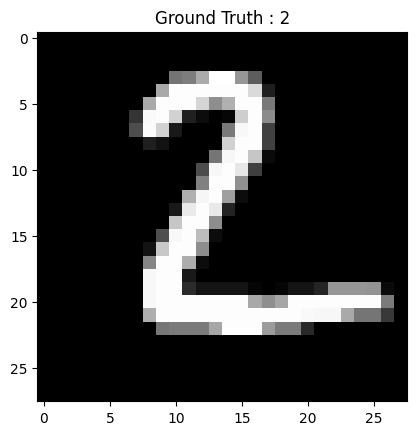

In [33]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[1],:])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[1],:])),axis=1))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Probability of all the classes: [[8.4583398e-08 1.9847293e-07 9.9981910e-01 3.2009084e-05 1.0617930e-09
  8.2029796e-09 3.4409966e-09 1.4757722e-04 9.8862790e-07 3.6028833e-08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Model prediction: 2


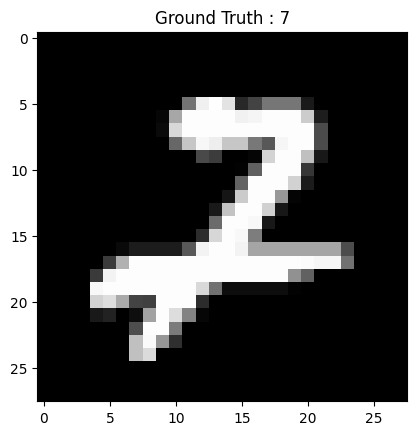

In [34]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[9009]])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[9009]])),axis=1))

# Display the predicted image
plt.imshow(test_images[9009], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[9009]))
plt.show()

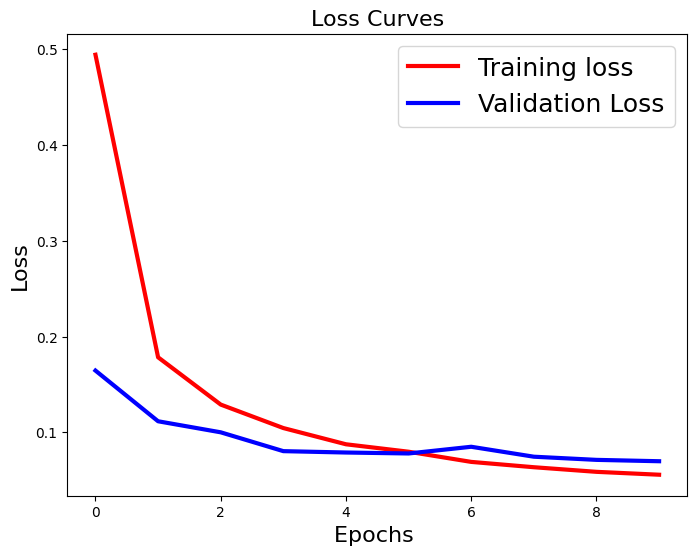

In [35]:
# Let us observe the training over the epochs

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

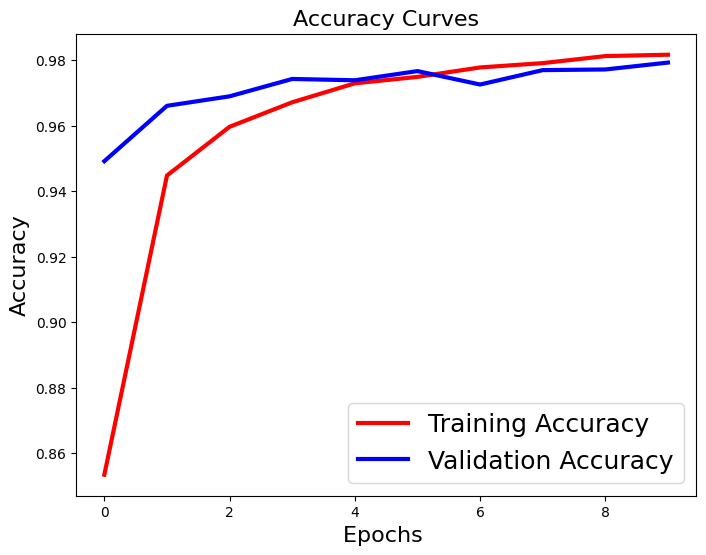

In [36]:

#Plot the Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

### Confusion Matrix

In [37]:
DIGITS = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
}

In [38]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([DIGITS[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([DIGITS[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [39]:
print(confusion_matrix(test_labels_one_hot, model.predict(test_data)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Pred    0     1     2    3    4    5    6     7    8    9
True                                                     
0     976     0     0    0    0    0    1     0    2    1
1       1  1126     5    0    1    0    1     1    0    0
2       8     2  1012    3    1    0    1     4    1    0
3       0     0     2  987    0    6    0     7    6    2
4       0     1     1    0  960    0    2     1    1   16
5       2     0     0   11    1  870    4     0    1    3
6       6     3     0    0    5    5  937     0    1    1
7       2     5    12    1    2    0    0  1000    0    6
8       8     0     6    1    3    4    1     3  943    5
9       2     3     0    3    9    1    0     7    2  982


## Classification report

In [40]:
from sklearn.metrics import accuracy_score, classification_report

In [41]:

y_true = np.argmax(test_labels_one_hot, axis=1)
y_pred = np.argmax(model.predict(test_data), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [42]:
report = classification_report(y_true, y_pred,digits=4)

In [43]:
print(report)

              precision    recall  f1-score   support

           0     0.9711    0.9959    0.9834       980
           1     0.9877    0.9921    0.9899      1135
           2     0.9750    0.9806    0.9778      1032
           3     0.9811    0.9772    0.9792      1010
           4     0.9776    0.9776    0.9776       982
           5     0.9819    0.9753    0.9786       892
           6     0.9894    0.9781    0.9837       958
           7     0.9775    0.9728    0.9751      1028
           8     0.9854    0.9682    0.9767       974
           9     0.9665    0.9732    0.9699      1009

    accuracy                         0.9793     10000
   macro avg     0.9793    0.9791    0.9792     10000
weighted avg     0.9794    0.9793    0.9793     10000



In [44]:
print(accuracy_score(y_true, y_pred))

0.9793
